## Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


## Reading CSV

In [2]:
students = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

## Peeking into data

In [3]:
students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
students.shape

(1000, 8)

In [6]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- There are 1000 rows and 8 columns
- Column headers are 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score' and 'writing score'
- There is no null columns

## Distribution of scores

### Maths score

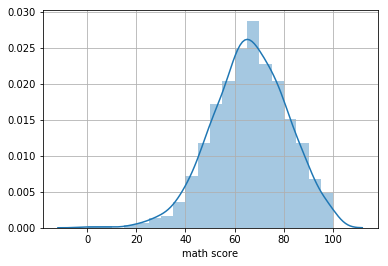

In [7]:
sns.distplot(students['math score'], bins=20)
plt.grid()

- Most students scored between 60 - 75%. 

### Reading score

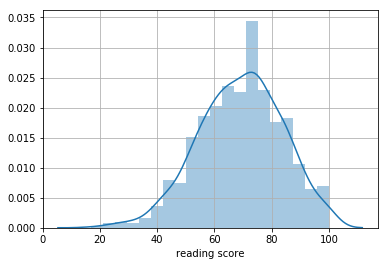

In [8]:
sns.distplot(students['reading score'], bins=20)
plt.grid()

- Most students scored between 60 - 80%

### Writing score

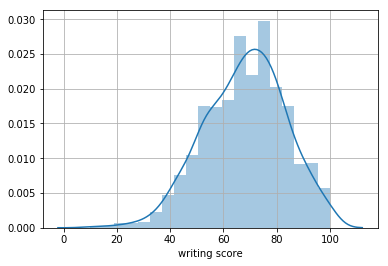

In [9]:
sns.distplot(students['writing score'], bins=20)
plt.grid()

- Students scored between 65 - 80%

## Distribution of catagories

### Gender count

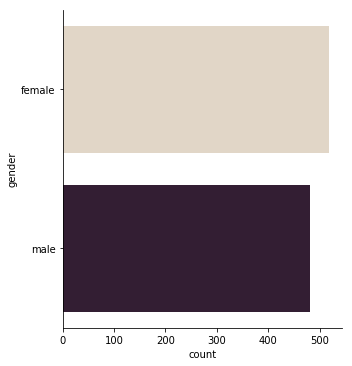

In [10]:
sns.catplot(y="gender",  kind="count", palette="ch:.25", data=students);

In [11]:
students['gender'].value_counts(normalize=True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

Female students are slightly more in count when compared to male students.

### Race/ethnicity count

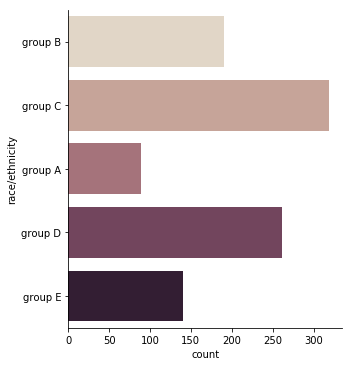

In [12]:
sns.catplot(y="race/ethnicity",  kind="count", palette="ch:.25", data=students);

In [13]:
students['race/ethnicity'].value_counts(normalize=True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

- More students are from group C. 31.9% of total sudents belongs to group C.
- 8.9% students belongs to group A and it is the smallest group.

### Parent level of education

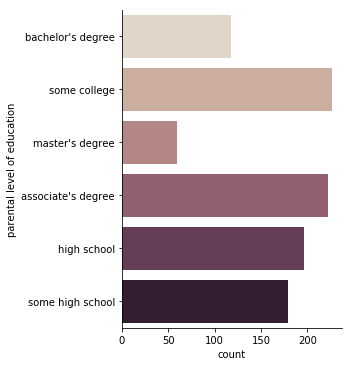

In [14]:
sns.catplot(y="parental level of education",  kind="count", palette="ch:.25", data=students);

In [15]:
students['parental level of education'].value_counts(normalize=True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

- Parents of most students have some college education. A total of 62.4% have some college education.
- Only 5.9% parents have masters degree.
- Most parents have some college degree or associate degree

### Lunch count

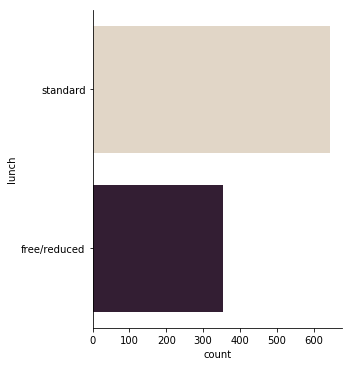

In [16]:
sns.catplot(y="lunch",  kind="count", palette="ch:.25", data=students);

In [17]:
students['lunch'].value_counts(normalize=True) * 100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

- 64.5% students are eating standard food.
- 35.5% students gets free/reduced food.

### Test preparation course

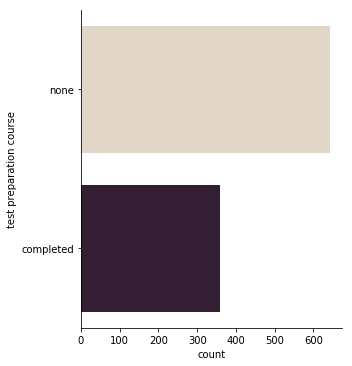

In [18]:
sns.catplot(y="test preparation course",  kind="count", palette="ch:.25", data=students);

In [19]:
students['test preparation course'].value_counts(normalize=True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

- Most of the students have not completed the test preperation course.
- Only 35.8% people have completed the test preparation course

## Influence of test preparation score on exam score

### math score

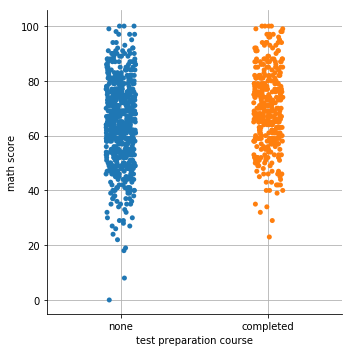

In [20]:
sns.catplot(x="test preparation course", y="math score", data=students);
plt.grid()

- All the students that completed the course have scored above 20.
- 4 students who didnt completed the course have scored below 20

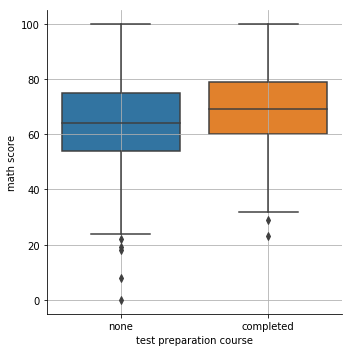

In [21]:
sns.catplot(x="test preparation course", y="math score", kind='box', data=students);
plt.grid()

- Average marks are high for students who have finished the test preparation course

### reading score

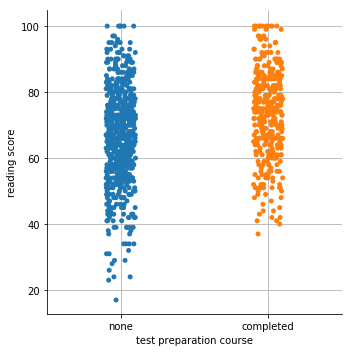

In [22]:
sns.catplot(x="test preparation course", y="reading score", data=students);
plt.grid()

- Here we can see an interesing difference between students who finished the course and those who didnt finish.
- Almost all the students who finished the course has scored more than 40 for the reading test

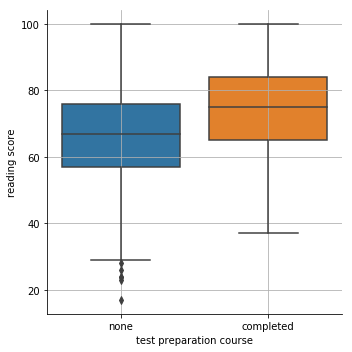

In [23]:
sns.catplot(x="test preparation course", y="reading score", kind='box', data=students);
plt.grid()

- Average marks are high for students who have finished the test preparation course

### writing score

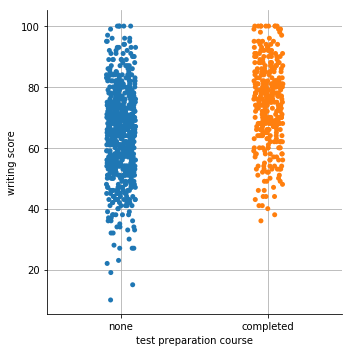

In [24]:
sns.catplot(x="test preparation course", y="writing score", data=students);
plt.grid()

- For writing test also students who completed the course have scored more than 40% marks

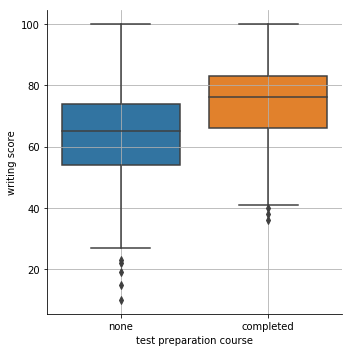

In [25]:
sns.catplot(x="test preparation course", y="writing score", kind='box', data=students);
plt.grid()

- Average marks are high for students who have finished the test preparation course

## Influence of parents education on score

### Maths score

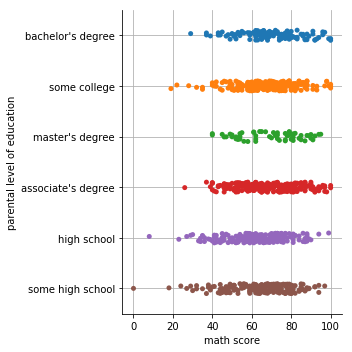

In [26]:
sns.catplot(y="parental level of education", x="math score", data=students);
plt.grid()

- Childrens of parents having masters degree have shown good performance for maths but havent scored full marks
- Childrens of parents having bachelors's/associate's degree also shown good performance. However few students have less than 40 marks 
- In the group of students who have scored less than 40%, a good percentage comes from parents having some college, some high school and high school.
- Childrens whose parents have high school or some high school education have scored less that 20% as well.
- We can see students scored more than 80% in all groups irrespective of their parents education
- One student have score no marks whose parent has some high school education
- Parents of the students who have scored full marks have bachelors, associate or come college degree.

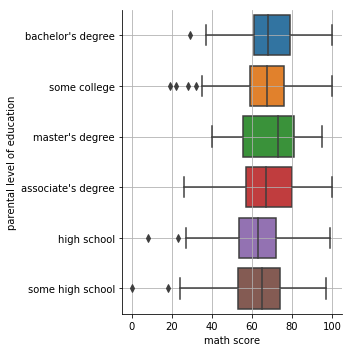

In [27]:
sns.catplot(y="parental level of education", x="math score", kind='box', data=students);
plt.grid()

- Average marks are highest for students whose parents have master's degree and is lowest for students whose parents have some high school education

### reading score

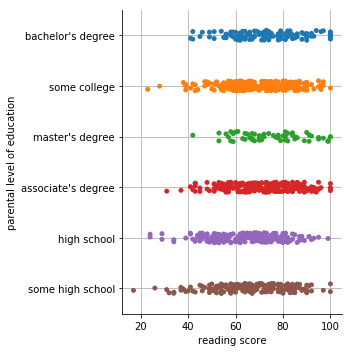

In [28]:
sns.catplot(y="parental level of education", x="reading score", data=students);
plt.grid()

- Childrens of parents having masters and bacholers degree have shown good performance for reading all of them have scored above 40%
- Childrens of parents having associate's degree also shown good performance. However few students have less than 40% marks 
- In the group of students who have scored less than 40%, a good percentage comes from parents having some college, some high school and high school.
- Childrens whose parents have high school or some high school education have scored less that 20% as well.
- We can see students scored more than 80% in all groups irrespective of their parents education
- Students from all group have scored full marks.
- The parents of the student who have scored lowest marks have some high school education

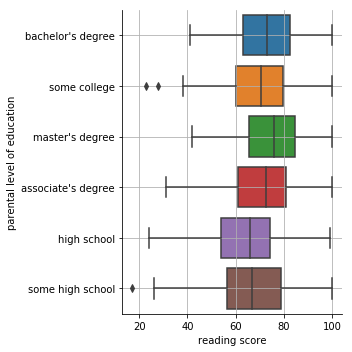

In [29]:
sns.catplot(y="parental level of education", x="reading score", kind='box', data=students);
plt.grid()

- Average marks are highest for students whose parents have master's degree and is lowest for students whose parents have some high school/ high school education

### writing score

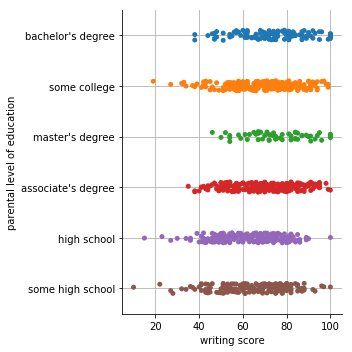

In [30]:
sns.catplot(y="parental level of education", x="writing score", data=students);
plt.grid()

- Childrens of parents having masters degree have shown good performance for maths
- Childrens of parents having bachelors's/associate's degree also shown good performance. However few students have less than 40 marks 
- In the group of students who have scored less than 40%, a good percentage comes from parents having some college, some high school and high school.
- Childrens whose parents have high school or some high school education have scored less that 20% as well.
- We can see students scored more than 80% in all groups irrespective of their parents education

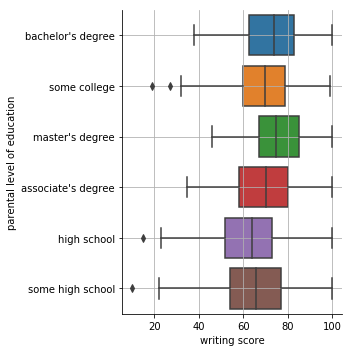

In [31]:
sns.catplot(y="parental level of education", x="writing score", kind='box', data=students);
plt.grid()

- Average marks are highest for students whose parents have master's degree and is lowest for students whose parents have some high school/ high school education